In [2]:
import pint

In [3]:
# download modsim.py if necessary

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
    
download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')

Downloaded modsim.py


In [6]:
# import functions from modsim

from modsim import *

In [8]:
download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/data/World_population_estimates.html')

Downloaded World_population_estimates.html


In [10]:
from pandas import read_html

In [11]:
filename = 'World_population_estimates.html'
tables = read_html(filename,
                   header=0, 
                   index_col=0,
                   decimal='M')

The arguments are:

-   `filename`: The name of the file (including the directory it's in)
    as a string. This argument can also be a URL starting with `http`.

-   `header`: Indicates which row of each table should be considered the
    *header*, that is, the set of labels that identify the columns. In
    this case it is the first row (numbered 0).

-   `index_col`: Indicates which column of each table should be
    considered the *index*, that is, the set of labels that identify
    the rows. In this case it is the first column, which contains the
    years.

-   `decimal`: Normally this argument is used to indicate which
    character should be considered a decimal point, because some
    conventions use a period and some use a comma. In this case I am
    abusing the feature by treating `M` as a decimal point, which allows
    some of the estimates, which are expressed in millions, to be read
    as numbers.

The result, which is assigned to `tables`, is a sequence that contains
one `DataFrame` for each table. A `DataFrame` is an object, defined by
Pandas, that represents tabular data.

To select a `DataFrame` from `tables`, we can use the bracket operator
like this:

In [12]:
table2 = tables[2]

In [13]:
table2.head()

,United States Census Bureau (2017)[28],Population Reference Bureau (1973–2016)[15],United Nations Department of Economic and Social Affairs (2015)[16],Maddison (2008)[17],HYDE (2007)[24],Tanton (1994)[18],Biraben (1980)[19],McEvedy & Jones (1978)[20],Thomlinson (1975)[21],Durand (1974)[22],Clark (1967)[23]
Year,,,,,,,,,,,
1950,2557628654,2.516000e+09,2.525149e+09,2.544000e+09,2.527960e+09,2.400000e+09,2.527000e+09,2.500000e+09,2.400000e+09,NaN,2.486000e+09
1951,2594939877,NaN,2.572851e+09,2.571663e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1952,2636772306,NaN,2.619292e+09,2.617949e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1953,2682053389,NaN,2.665865e+09,2.665959e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1954,2730228104,NaN,2.713172e+09,2.716927e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
table2.columns = ['census', 'prb', 'un', 'maddison', 
                  'hyde', 'tanton', 'biraben', 'mj', 
                  'thomlinson', 'durand', 'clark']

In [15]:
census = table2.census / 1e9

In [18]:
census.tail()

Year
2012    7.013871
2013    7.092128
2014    7.169968
2015    7.247893
2016    7.325997
Name: census, dtype: float64

In [19]:
un = table2.un / 1e9
un.tail()

Year
2012    7.080072
2013    7.162119
2014    7.243784
2015    7.349472
2016         NaN
Name: un, dtype: float64

In [20]:
def plot_estimates():
    census.plot(style=':', label='US Census')
    un.plot(style='--', label='UN DESA')
    decorate(xlabel='Year', 
             ylabel='World population (billions)') 

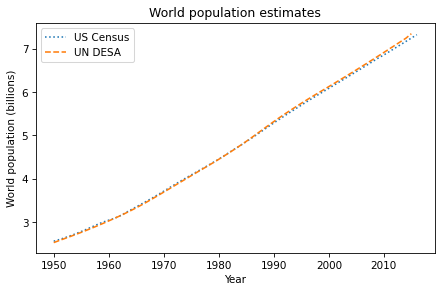

In [21]:
plot_estimates()
decorate(title='World population estimates')

In [22]:
from numpy import abs

In [23]:
abs_error = abs(un - census)
abs_error.tail()

Year
2012    0.066201
2013    0.069991
2014    0.073816
2015    0.101579
2016         NaN
dtype: float64

When you subtract two `Series` objects, the result is a new `Series`.
Because one of the estimates for 2016 is `NaN`, the result for 2016 is `NaN`.

To summarize the results, we can compute the *mean absolute error*.

In [24]:
from numpy import mean

mean(abs_error)

np.float64(0.029034508242424265)

In [25]:
from numpy import max

max(abs_error)

np.float64(0.10157921199999986)

In the worst case, they differ by about 0.1 billion.

Now 0.1 billion is a lot of people, so that might sound like a serious discrepancy.
But counting everyone is the world is hard, and we should not expect the estimates to be exact.

Another way to quantify the magnitude of the difference is *relative error*, which is the size of the error divided by the estimates themselves.

In [26]:
rel_error = 100 * abs_error / census
rel_error.tail()

Year
2012    0.943860
2013    0.986888
2014    1.029514
2015    1.401500
2016         NaN
dtype: float64

In [27]:
mean(rel_error)

np.float64(0.5946585816022846)

In [28]:
census[1950]

np.float64(2.557628654)

In [29]:
total_growth = census[2016] - census[1950]

In [30]:
t_0 = census.index[0]
t_0

np.int64(1950)

In [31]:
t_end = census.index[-1]
t_end

np.int64(2016)

In [32]:
elapsed_time = t_end - t_0
elapsed_time

np.int64(66)

In [33]:
p_0 = census[t_0]
p_end = census[t_end]

In [34]:
total_growth = p_end - p_0
total_growth

np.float64(4.768368055)

In [35]:
annual_growth = total_growth / elapsed_time
annual_growth

np.float64(0.07224800083333333)

## Simulating Population Growth

Our simulation will start with the observed population in 1950, `p_0`,
and add `annual_growth` each year. To store the results, we'll use a
`TimeSeries` object:

In [36]:
results = TimeSeries()

In [37]:
results[t_0] = p_0

In [38]:
show(results)

,Quantity
Time,
1950,2.557629


In [39]:
for t in range(t_0, t_end):
    results[t+1] = results[t] + annual_growth

The values of `t` go from `t_0` to `t_end`, including the first but not the last.

Inside the loop, we compute the population for the next year by adding the population for the current year and `annual_growth`. 

The last time through the loop, the value of `t` is 2015, so the last label in `results` is 2016.

Here's what the results look like, compared to the estimates.

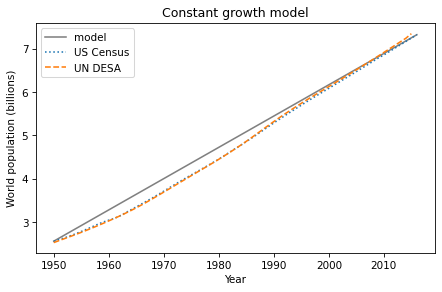

In [40]:
results.plot(color='gray', label='model')
plot_estimates()
decorate(title='Constant growth model')

## Summary

This chapter is a first step toward modeling changes in world population growth during the last 70 years.

We used Pandas to read data from a web page and store the results in a `DataFrame`.
From the `DataFrame` we selected two `Series` objects and used them to compute absolute and relative errors.

Then we computed average population growth and used it to build a simple model with constant annual growth.
The model fits recent data pretty well; nevertheless, there are two reasons we should be skeptical:

* There is no obvious mechanism that could cause population growth to be constant from year to year. Changes in population are determined by the fraction of people who die and the fraction of people who give birth, so we expect them to depend on the current population.

* According to this model, world population would keep growing at the same rate forever, and that does not seem reasonable.

In the next chapter we'll consider other models that might fit the data better and make more credible predictions.